In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [ ]:
url = "https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising.csv"
df = pd.read_csv(url)

# Asignar nombres a las columnas
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

# Generar un resumen de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Verificar y reemplazar valores faltantes en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Construir el pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

# Separar características y etiqueta
X_train = train_df.drop(columns=['Sales'])
y_train = train_df['Sales']

# Aplicar el pipeline al conjunto de entrenamiento
X_train_processed = pipeline.fit_transform(X_train)

In [ ]:
X_train.describe()

,TV,Radio,Newspaper
count,160.000000,160.000000,160.000000
mean,150.019375,22.875625,29.945625
std,84.418857,14.805216,20.336449
min,0.700000,0.000000,0.300000
25%,77.750000,9.825000,12.875000
50%,150.650000,21.200000,25.600000
75%,218.825000,36.425000,44.500000
max,296.400000,49.600000,100.900000


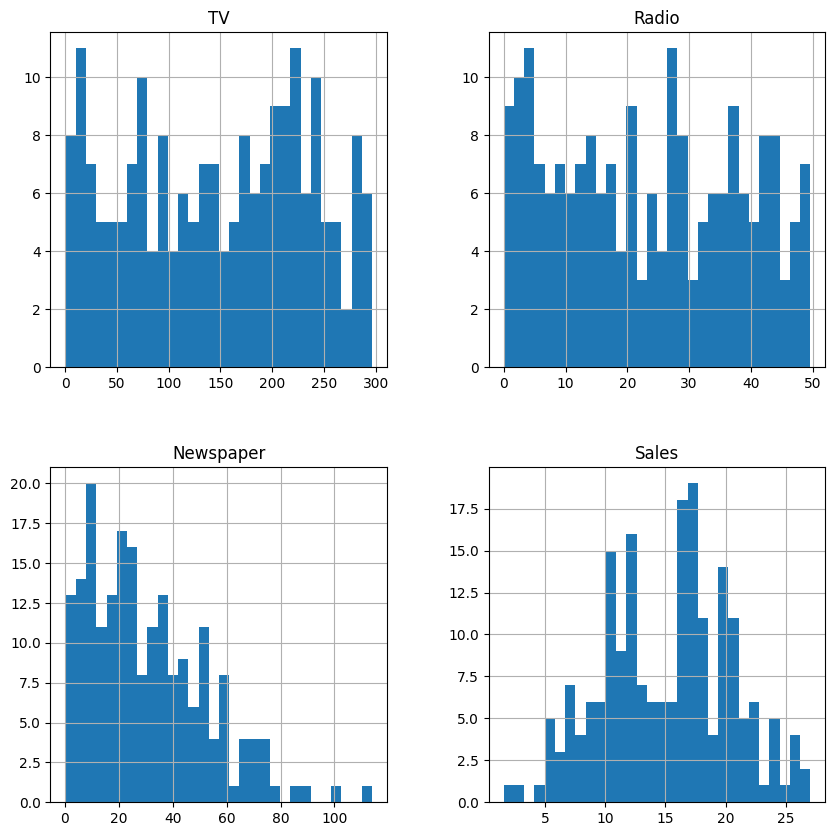

In [ ]:
import matplotlib.pyplot as plt

# Generar histogramas de frecuencias para todas las características
df.hist(bins=30, figsize=(10, 10))
plt.show()

In [ ]:
# Calcular IQR y eliminar valores atípicos
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

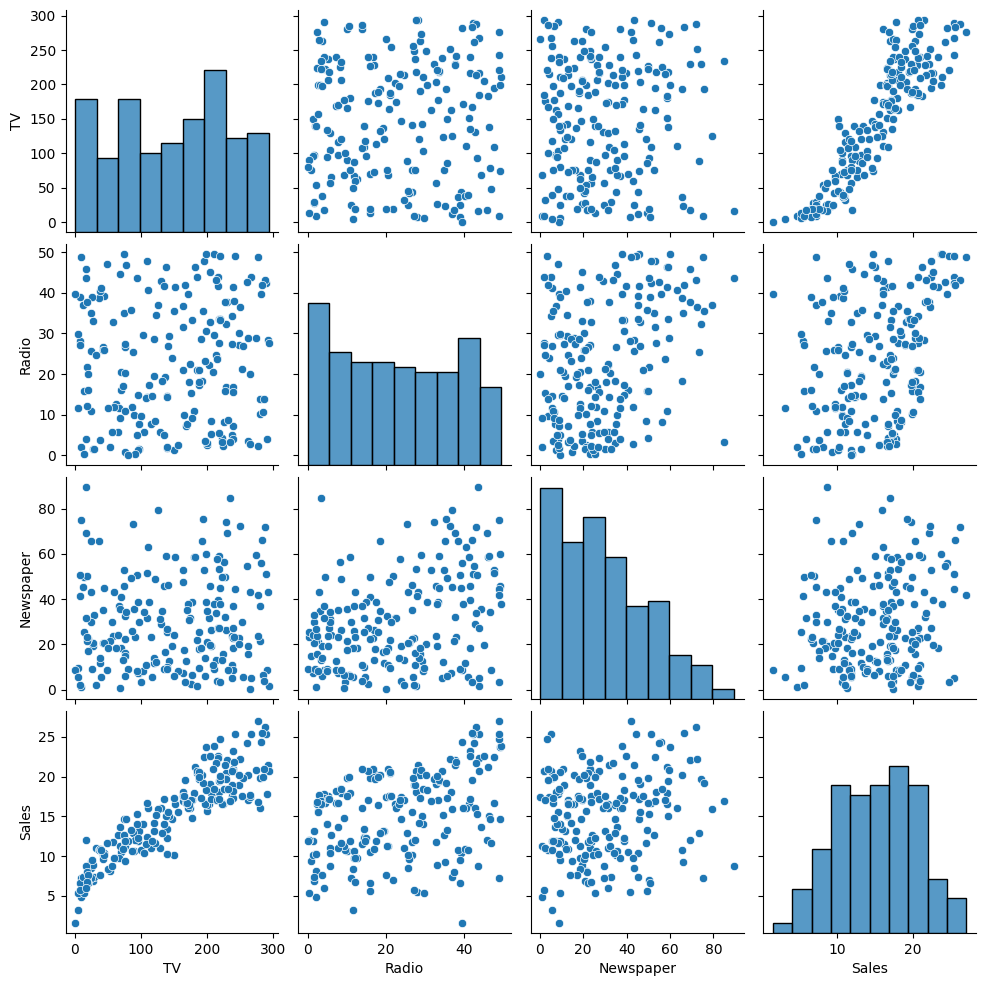

In [ ]:
import seaborn as sns

# Generar la matriz de dispersión
sns.pairplot(df_clean)
plt.show()

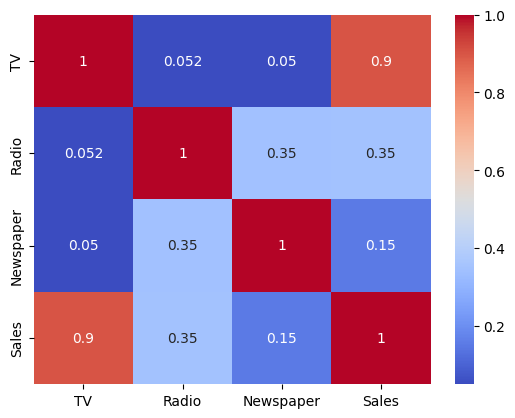

In [ ]:
# Generar la matriz de correlación
correlation_matrix = df_clean.corr()

# Visualizar la matriz de correlación usando un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Considerar los valores de correlación para determinar la influencia de las variables
print(correlation_matrix['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.899974
Radio        0.348566
Newspaper    0.151764
Name: Sales, dtype: float64


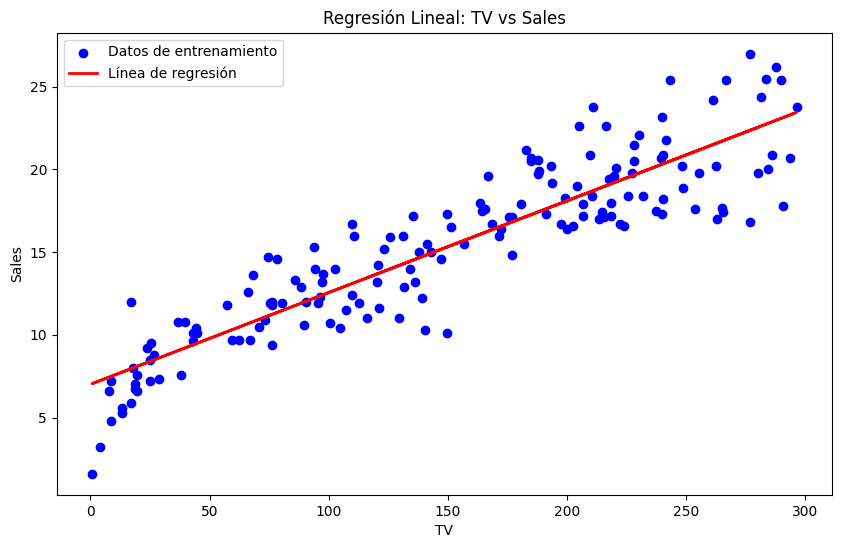

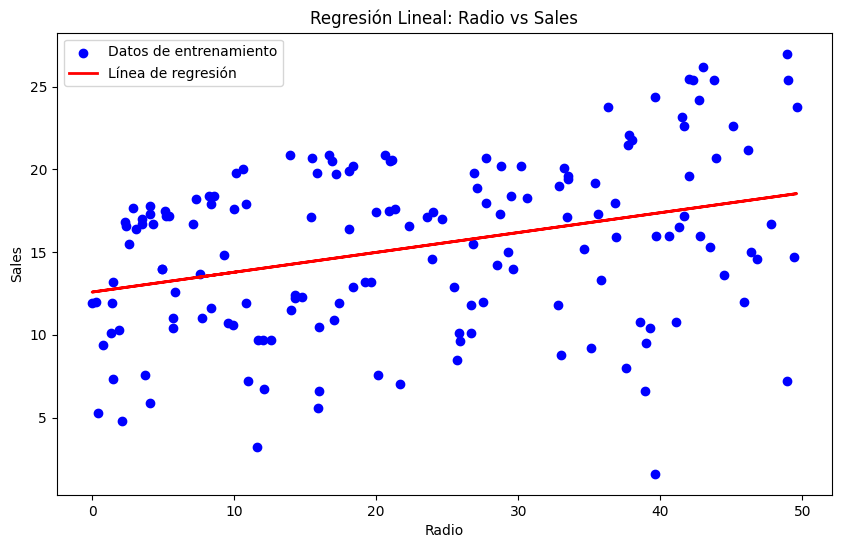

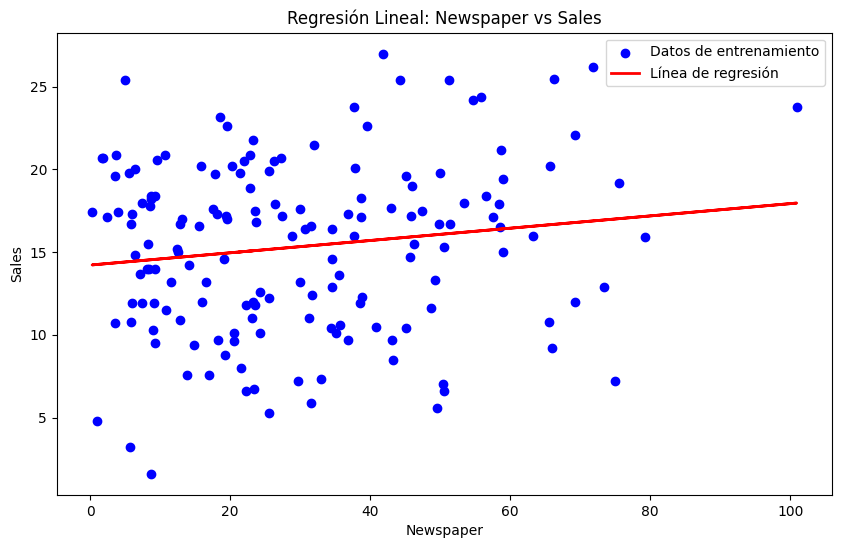

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Dividir los datos en conjunto de entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separar características y etiqueta
X_train = train_df.drop(columns=['Sales'])
y_train = train_df['Sales']

# Pipeline de preprocesamiento
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Función para entrenar y graficar modelos
def train_and_plot(feature):
    X_feature = X_train[[feature]]
    X_feature_processed = pipeline.fit_transform(X_feature)
    model = LinearRegression()
    model.fit(X_feature_processed, y_train)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, y_train, color='blue', label='Datos de entrenamiento')
    plt.plot(X_feature, model.predict(X_feature_processed), color='red', linewidth=2, label='Línea de regresión')
    plt.title(f'Regresión Lineal: {feature} vs Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    return model

# Entrenar y graficar modelos para cada característica
model_tv = train_and_plot('TV')
model_radio = train_and_plot('Radio')
model_newspaper = train_and_plot('Newspaper')

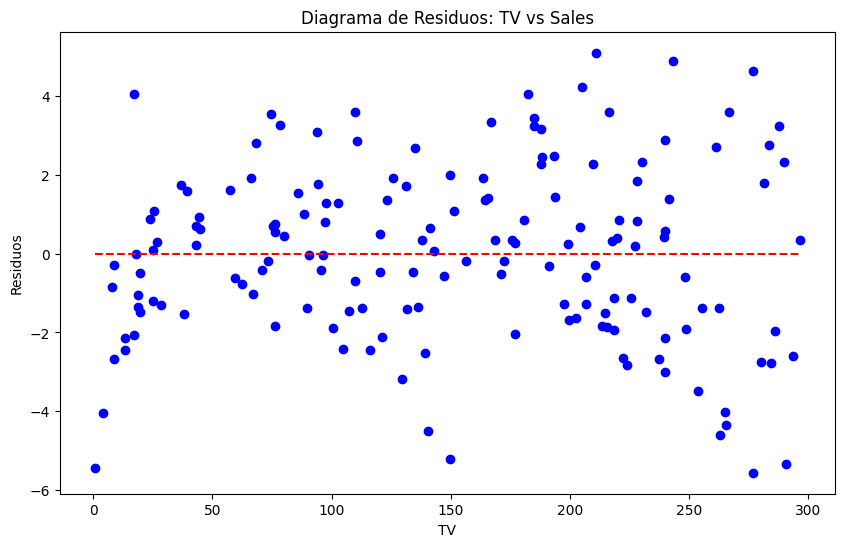

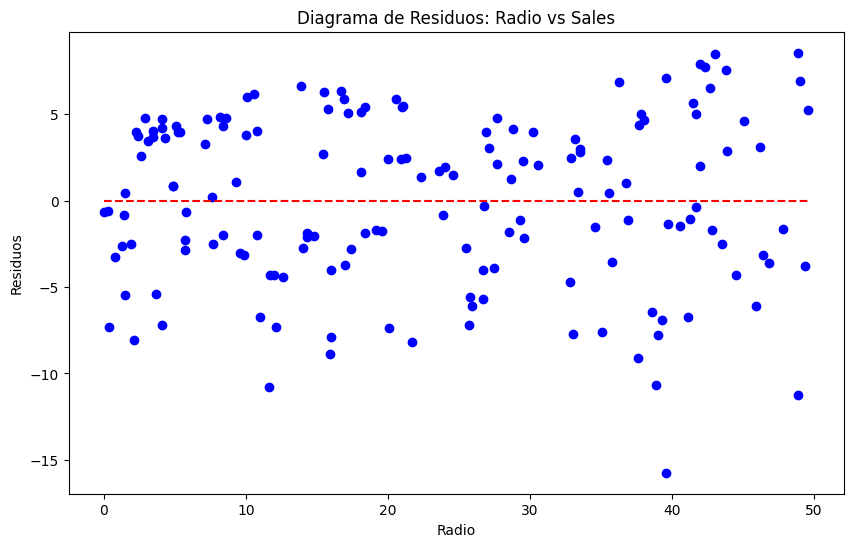

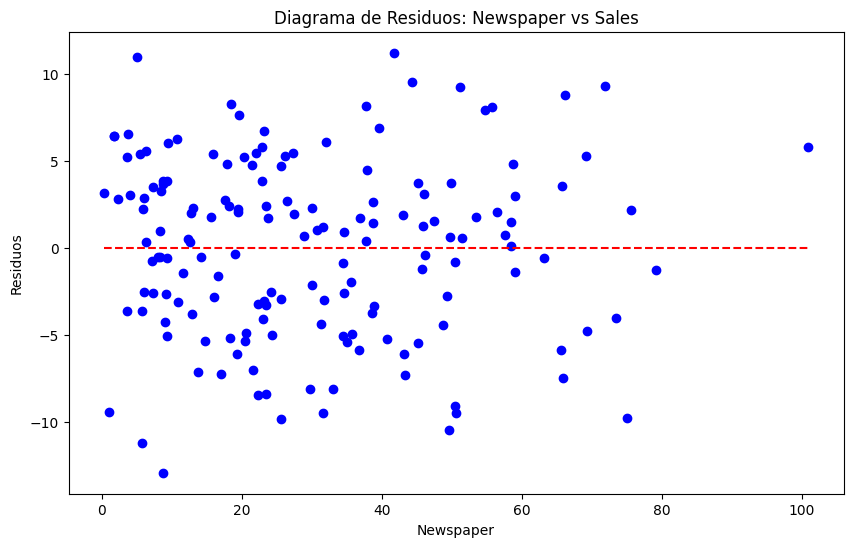

In [ ]:
def plot_residuals(model, feature):
    X_feature = X_train[[feature]]
    X_feature_processed = pipeline.fit_transform(X_feature)
    residuals = y_train - model.predict(X_feature_processed)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, residuals, color='blue')
    plt.hlines(y=0, xmin=X_feature.min(), xmax=X_feature.max(), colors='red', linestyles='dashed')
    plt.title(f'Diagrama de Residuos: {feature} vs Sales')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.show()

# Generar diagramas de residuos para cada modelo
plot_residuals(model_tv, 'TV')
plot_residuals(model_radio, 'Radio')
plot_residuals(model_newspaper, 'Newspaper')

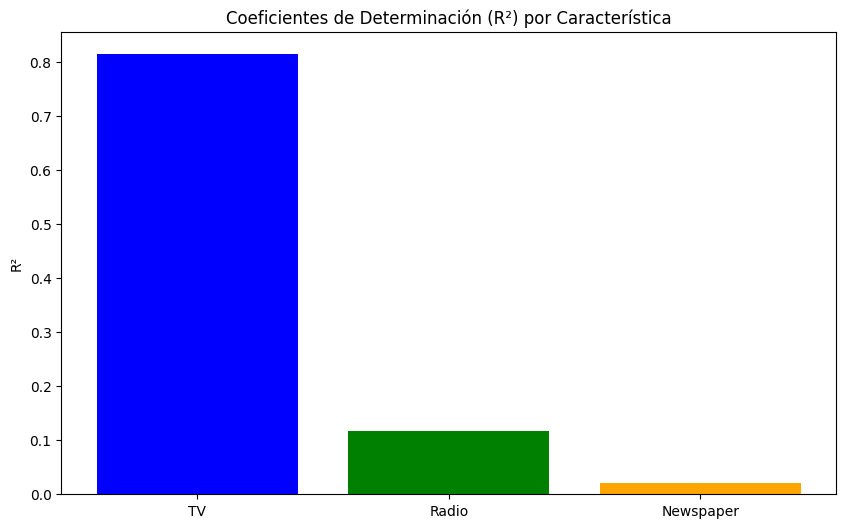

In [ ]:
import numpy as np

# Función para ajustar el pipeline y calcular R² para cada característica
def calculate_r2_for_feature(feature):
    X_feature = X_train[[feature]]
    pipeline_feature = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_feature_processed = pipeline_feature.fit_transform(X_feature)
    model = LinearRegression()
    model.fit(X_feature_processed, y_train)
    return model.score(X_feature_processed, y_train), model, pipeline_feature

# Calcular los coeficientes de determinación para cada característica
r2_tv, model_tv, pipeline_tv = calculate_r2_for_feature('TV')
r2_radio, model_radio, pipeline_radio = calculate_r2_for_feature('Radio')
r2_newspaper, model_newspaper, pipeline_newspaper = calculate_r2_for_feature('Newspaper')

# Graficar los coeficientes de determinación
plt.figure(figsize=(10, 6))
r2_values = [r2_tv, r2_radio, r2_newspaper]
features = ['TV', 'Radio', 'Newspaper']
plt.bar(features, r2_values, color=['blue', 'green', 'orange'])
plt.title('Coeficientes de Determinación (R²) por Característica')
plt.ylabel('R²')
plt.show()

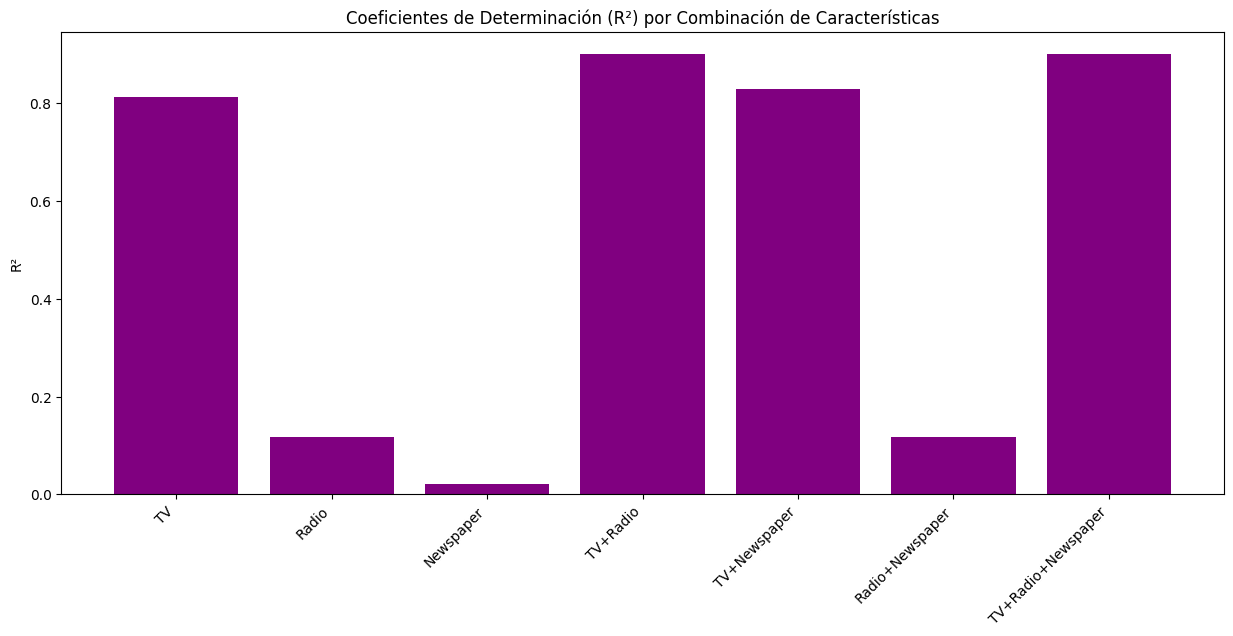

In [ ]:
import itertools

# Generar todas las posibles combinaciones de características
features = ['TV', 'Radio', 'Newspaper']
combinations = []
for i in range(1, len(features) + 1):
    combinations.extend(itertools.combinations(features, i))

# Función para entrenar modelos con combinaciones de características y calcular R²
def train_combinations(combinations):
    r2_scores = []
    for comb in combinations:
        X_comb = X_train[list(comb)]
        X_comb_processed = pipeline.fit_transform(X_comb)
        model = LinearRegression()
        model.fit(X_comb_processed, y_train)
        r2_scores.append(model.score(X_comb_processed, y_train))
    return r2_scores

# Entrenar modelos y calcular R²
r2_comb_scores = train_combinations(combinations)

# Graficar los coeficientes de determinación para todas las combinaciones
comb_labels = ['+'.join(comb) for comb in combinations]
plt.figure(figsize=(15, 6))
plt.bar(comb_labels, r2_comb_scores, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Coeficientes de Determinación (R²) por Combinación de Características')
plt.ylabel('R²')
plt.show()

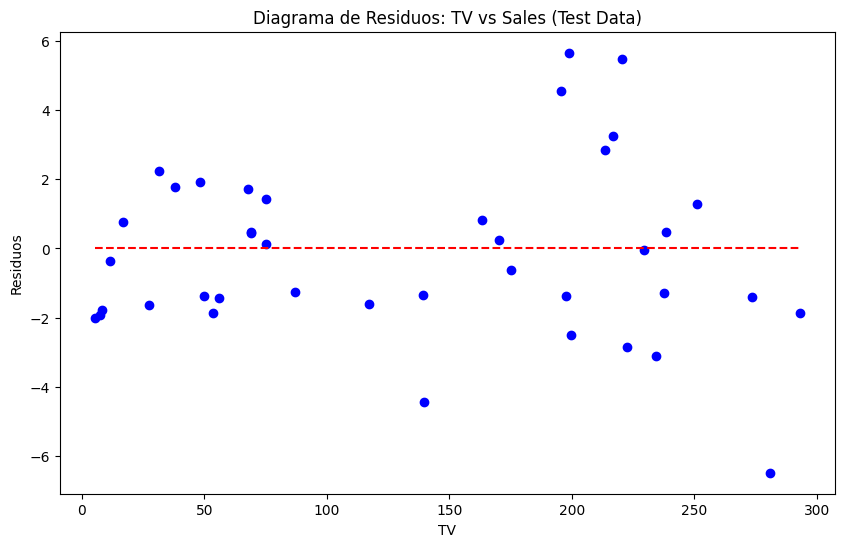

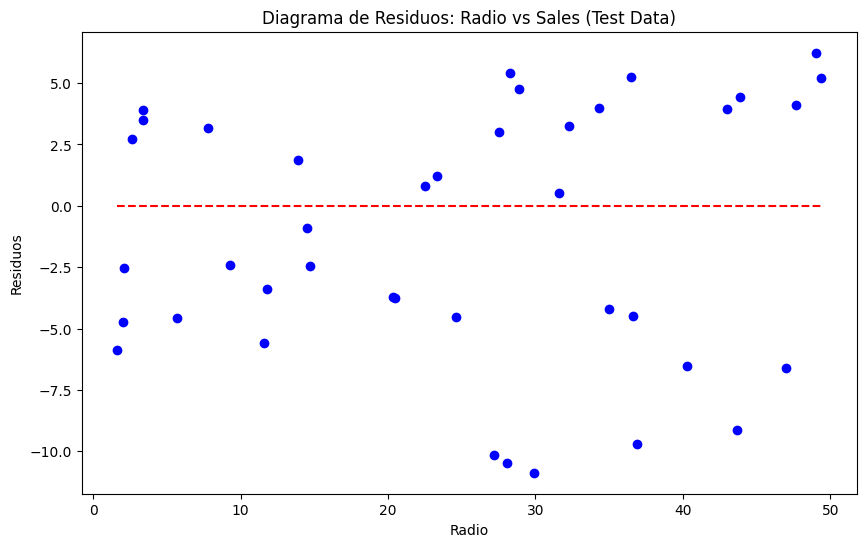

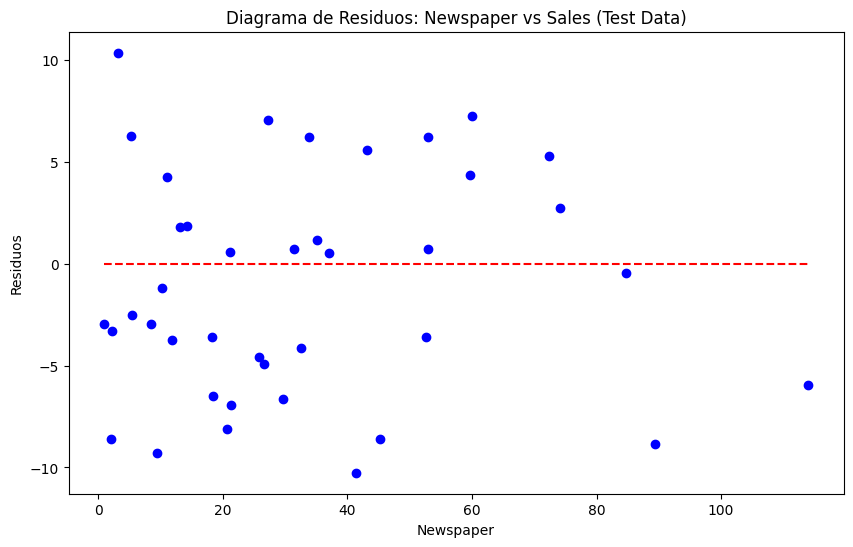

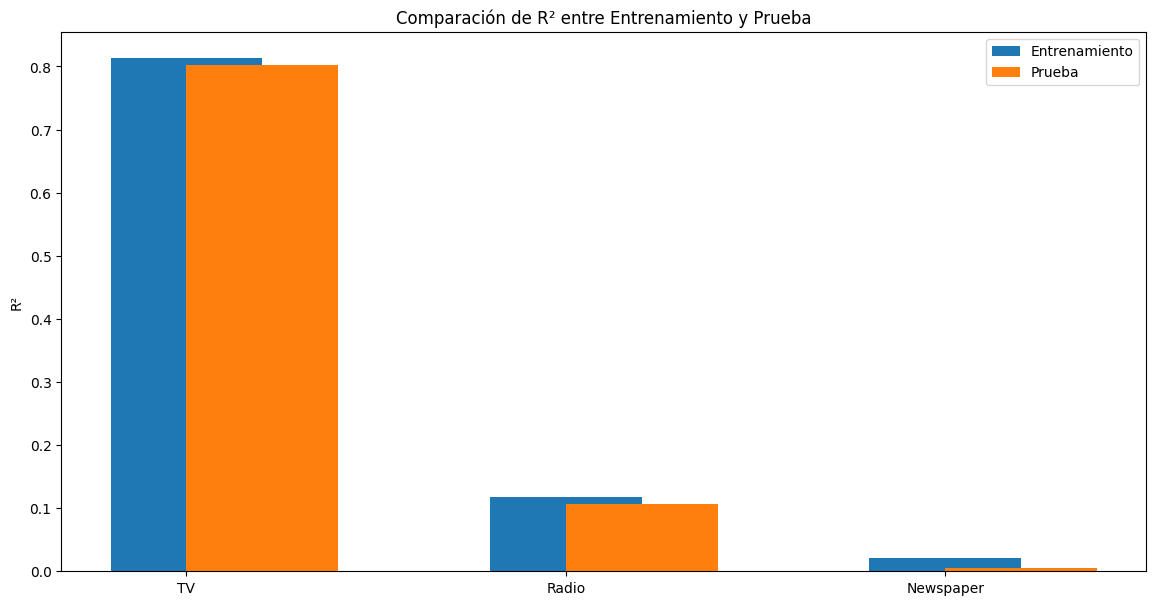

In [ ]:
# Evaluar cada modelo previamente entrenado con los datos de prueba
def evaluate_model_with_test_data(feature, model, pipeline):
    X_test_feature = test_df[[feature]]
    X_test_feature_processed = pipeline.transform(X_test_feature)
    y_test = test_df['Sales']
    r2_test = model.score(X_test_feature_processed, y_test)

    # Crear gráfico de residuos para el conjunto de prueba
    residuals_test = y_test - model.predict(X_test_feature_processed)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_feature, residuals_test, color='blue')
    plt.hlines(y=0, xmin=X_test_feature.min(), xmax=X_test_feature.max(), colors='red', linestyles='dashed')
    plt.title(f'Diagrama de Residuos: {feature} vs Sales (Test Data)')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.show()

    return r2_test

# Calcular los coeficientes de determinación para cada característica en los datos de prueba
r2_test_tv = evaluate_model_with_test_data('TV', model_tv, pipeline_tv)
r2_test_radio = evaluate_model_with_test_data('Radio', model_radio, pipeline_radio)
r2_test_newspaper = evaluate_model_with_test_data('Newspaper', model_newspaper, pipeline_newspaper)

# Comparar los coeficientes de determinación entre entrenamiento y prueba
r2_train_values = [r2_tv, r2_radio, r2_newspaper]
r2_test_values = [r2_test_tv, r2_test_radio, r2_test_newspaper]

features = ['TV', 'Radio', 'Newspaper']
x = range(len(features))

plt.figure(figsize=(14, 7))
plt.bar(x, r2_train_values, width=0.4, label='Entrenamiento', align='center')
plt.bar(x, r2_test_values, width=0.4, label='Prueba', align='edge')
plt.xticks(x, features)
plt.ylabel('R²')
plt.title('Comparación de R² entre Entrenamiento y Prueba')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Función para entrenar y evaluar un modelo polinómico
def train_polynomial_model(feature, degree):
    X_feature = X_train[[feature]]
    y = y_train

    # Crear un pipeline para el modelo polinómico
    polynomial_pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])

    polynomial_pipeline.fit(X_feature, y)

    # Evaluar en datos de prueba
    X_test_feature = test_df[[feature]]
    y_test = test_df['Sales']
    r2_test_poly = polynomial_pipeline.score(X_test_feature, y_test)

    return r2_test_poly

# Evaluar modelos polinómicos con diferentes grados
degrees = [2, 3, 4]
polynomial_r2_scores = {degree: train_polynomial_model('TV', degree) for degree in degrees}

print("R² Scores para Modelos Polinómicos (TV):")
for degree, r2_score in polynomial_r2_scores.items():
    print(f"Grado {degree}: {r2_score}")

R² Scores para Modelos Polinómicos (TV):
Grado 2: 0.8160942105168346
Grado 3: 0.8108678507676651
Grado 4: 0.8173262903054015


### Evaluación de Datos de Suficiencia y Adecuación

Los datos proporcionados incluyen inversiones en publicidad en TV, radio y periódicos, así como las ventas correspondientes. La cantidad de datos parece suficiente para construir un modelo predictivo básico.

### Selección del Modelo

El modelo de regresión lineal con la característica de TV ofrece la mejor solución, ya que presentó un coeficiente de determinación (R²) más alto que los modelos que usan radio y periódicos, tanto en los datos de entrenamiento como en los de prueba. Esto indica que la inversión en TV tiene una mayor correlación con las ventas.

### Sugerencias para Mejoras

1. **Agregar Más Características**: Incluir datos adicionales como promociones, precios de productos y factores estacionales.
2. **Modelos No Lineales**: Considerar modelos polinómicos o de regresión logística para capturar relaciones no lineales.
3. **Aumentar el Volumen de Datos**: Recoger más datos para mejorar la robustez y precisión del modelo.

### Recomendación para la Empresa

Recomiendo que la empresa se enfoque en aumentar la inversión en publicidad en TV, ya que este medio muestra la mayor correlación con las ventas. Además, recopilar datos adicionales y considerar modelos más complejos podría mejorar aún más las predicciones, permitiendo una estrategia de publicidad más eficiente y personalizada.